In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

import warnings
warnings.filterwarnings('ignore')

# I. Chargement des données :

In [2]:
df_jeux_up = pd.read_csv("../data/details_clean.csv")

In [3]:
df_avis_up = pd.read_csv("../data/avis_clean.csv")

# II. Statistiques

## 1. Notes

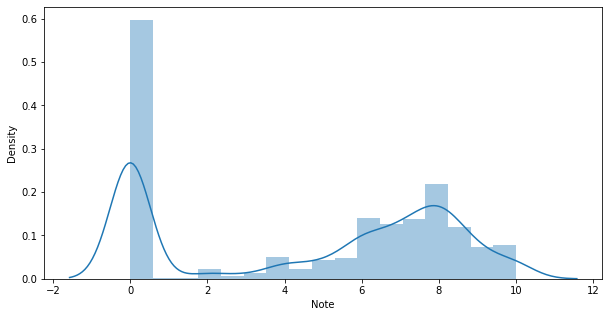

In [164]:
plt.figure(figsize=(10, 5))
notes = df_jeux_up["Note"]

sns.distplot(notes)
plt.show()

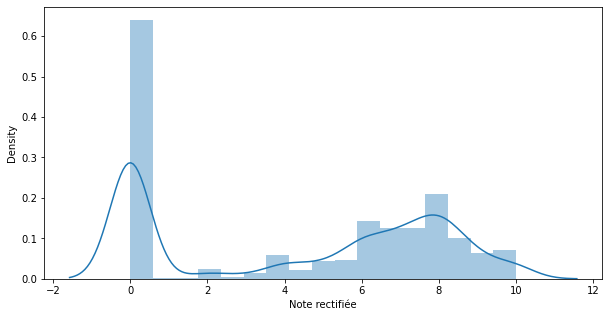

In [165]:
plt.figure(figsize=(10, 5))
notes = df_jeux_up["Note rectifiée"]

sns.distplot(notes)
plt.show()

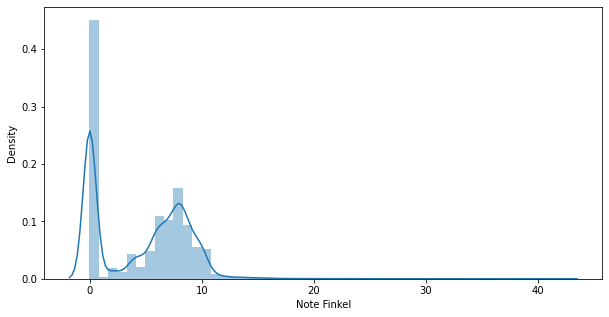

In [166]:
plt.figure(figsize=(10, 5))
notes = df_jeux_up["Note Finkel"]

sns.distplot(notes)
plt.show()

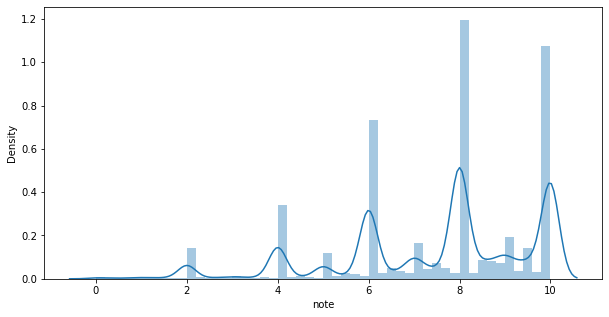

In [167]:
plt.figure(figsize=(10, 5))
notes = df_avis_up["note"]

sns.distplot(notes)
plt.show()

## 2. Date des avis

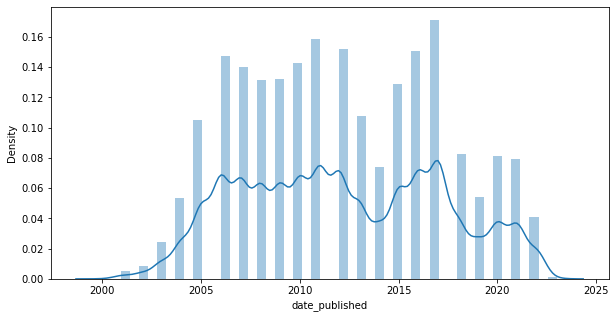

In [168]:
plt.figure(figsize=(10, 5))
notes = df_avis_up["date_published"]

sns.distplot(notes)
plt.show()

## 3. Mots fréquents selon les notes :

In [169]:
comments_df = df_avis_up[df_avis_up["comment"].notna()]

In [170]:
notes_int = comments_df["note"] // 1

In [171]:
words_notes = {}

for note in range(11):
    words_notes[note] = np.array(comments_df[notes_int == note]["comment"])

In [172]:
def get_wordcloud(data, stop_words):
    vectorizer = TfidfVectorizer(use_idf=False, stop_words=stop_words)
    vectors = vectorizer.fit_transform(data)

    counts = np.array(vectors.sum(axis=0))[0]

    dico = dict()
    words = vectorizer.get_feature_names()

    for i in range(len(words)):
        w = words[i]
        dico[w] = counts[i]

    return WordCloud(background_color='white', stopwords=stop_words, max_words=100).generate_from_frequencies(dico) 


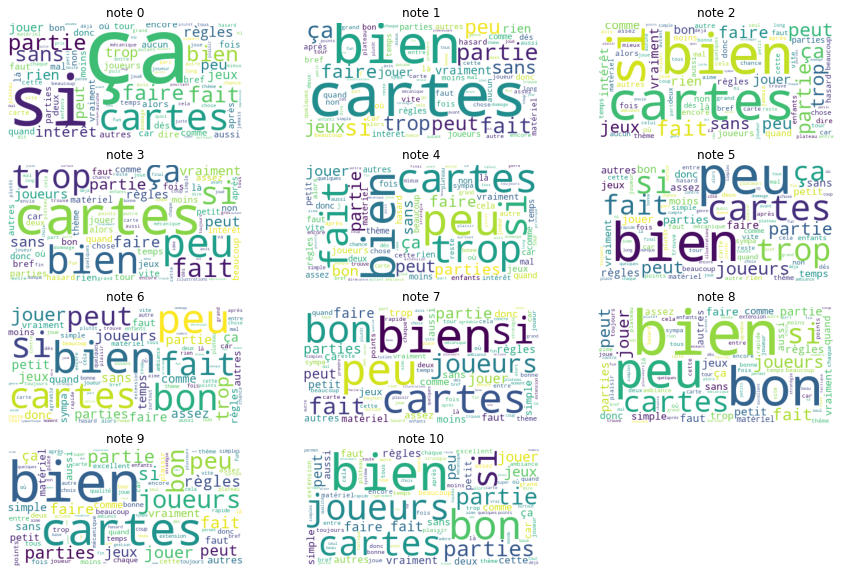

In [173]:
plt.figure(figsize=(15, 10))

for note in words_notes:
    wordcloud = get_wordcloud(words_notes[note], sw) 
    plt.subplot(4, 3, note + 1)
    plt.title(f"note {note}")
    plt.imshow(wordcloud)
    plt.axis('off')